# Analytics on the Telecommunication datain
In this analysis the following will be addressed
- User Overview Analysis
- User Engagement Analysis
- User Expriance analyis
- User Satisfuction Analysis

In [1]:
# System Modules....
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Module imports
import pandas as pd
#pd.set_option('max_column', None)
#pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [17]:
# My Custom Modules Importing
from script import file_read
from script import Overview
from script import ploting_fun

In [4]:
###################################PLOTTING FUNCTIONS For User Analytics on Telcco###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def format_float(value):
    return f'{value:,.2f}'

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


pd.options.display.float_format = format_float

## Task 1 - User Overview analysis

Understanding the business process of one company is a key factor in planning and taking measurable steps towards the need of the customers. So, conducting user overview analysis helps to have understand on the given dataset. Thus, the exploration data analysis is helpful in analyzing datasets to summarize their main characteristics. This can be done via visually assessment and programmatically. In this subtask, identifying missing values and cleaning are key parts.

To conduct full User Overview analysis & the following sub-tasks are your guidance: 

1. Start by identifying the top 10 handsets used by the customers.
2. Then, identify the top 3 handset manufacturers
3. Next, identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams



In [5]:
data = pd.read_csv('../data/clean_df_tel1.csv')

In [24]:
# filtering 
df_overvie = Overview.Marketing(data)
df_overvie.filter_necessary_columns()

In [26]:
# viewing
df_overvie.df.head(3)

,MSISDN/Number,Handset Type,Handset Manufacturer
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,Samsung
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),Samsung
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),Samsung


1. Top 10 handsets used Mostly by the customers

In [27]:
#top 10 handsets type
top_10_handsets =  df_overvie.get_top_handsets(10)
top_10_handsets

,Handset Type,MSISDN/Number
316,Huawei B528S-23A,20324
53,Apple iPhone 6S (A1688),9419
49,Apple iPhone 6 (A1586),9023
1395,undefined,8987
59,Apple iPhone 7 (A1778),6326
73,Apple iPhone Se (A1723),5187
66,Apple iPhone 8 (A1905),4993
78,Apple iPhone Xr (A2105),4568
955,Samsung Galaxy S8 (Sm-G950F),4520
75,Apple iPhone X (A1901),3813


2. Top 3 handset manufacturers

In [29]:
top3_manufacturers =  df_overvie.get_top_manufacturers(3)
top3_manufacturers

,Handset Manufacturer,MSISDN/Number
5,Apple,60137
103,Samsung,40839
52,Huawei,34423


3. The top 5 handsets per top 3 handset manufacturer

In [33]:
handsets = df_overvie.get_best_phones()

**** Apple ***
Handset Type
Apple iPhone 6S (A1688)    6760
Apple iPhone 6 (A1586)     6261
Apple iPhone 7 (A1778)     4700
Apple iPhone Se (A1723)    3756
Apple iPhone 8 (A1905)     3544
Name: MSISDN/Number, dtype: int64

**** Samsung ***
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3246
Samsung Galaxy J5 (Sm-J530)     2749
Samsung Galaxy A5 Sm-A520F      2709
Samsung Galaxy J3 (Sm-J330)     2590
Samsung Galaxy S7 (Sm-G930X)    2292
Name: MSISDN/Number, dtype: int64

**** Huawei ***
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1532
Huawei E5180                       1183
Huawei P20                         1110
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



### Task 1.1 

Task 1.1 - Your employer wants to have an overview of the users’ behavior on some applications.

Aggregate per user the following information in the column  
1. number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application

In [34]:
df_clean = data.copy()
aggregate = {"Bearer Id": 'count', 'Dur. (ms).1':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
aggregation_result = df_clean.groupby('MSISDN/Number').agg(aggregate)
aggregation_result.head()

,Bearer Id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,
"33,601,001,722.00",1,"116,720,140.00","36,053,108.00","842,637,466.00"
"33,601,001,754.00",1,"181,230,963.00","36,104,459.00","120,755,184.00"
"33,601,002,511.00",1,"134,969,374.00","39,306,820.00","556,659,663.00"
"33,601,007,832.00",1,"49,878,024.00","20,327,526.00","401,993,172.00"
"33,601,008,617.00",2,"37,104,453.00","94,280,527.00","1,363,130,417.00"


In [35]:
aggregation_result.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106856 entries, 33601001722.0 to 882397108489451.0
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Bearer Id         106856 non-null  int64  
 1   Dur. (ms).1       106856 non-null  float64
 2   Total UL (Bytes)  106856 non-null  float64
 3   Total DL (Bytes)  106856 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.1 MB


In [36]:
aggregation_result.quantile(0.25) 

Bearer Id                    1.00
Dur. (ms).1         71,308,343.00
Total UL (Bytes)    36,395,474.75
Total DL (Bytes)   314,832,283.50
Name: 0.25, dtype: float64

#### User beheviour ON Applications

In [40]:
# determind from this variables 
# Social Media, Google, Email, Youtube, Netflix, Gaming, Other . 
aggrigate = {
    'Total Social Media':'sum',
    'Total Google': 'sum', 
    'Total Youtube': 'sum', 
    'Total Netflix':'sum',
    'Total Gaming':'sum',
    'Total Other':'sum',
    'Total Email': 'sum',
    'Total':'sum'
}
user_app_usage = df_clean.copy()

user_app_usage["Total Google"]    = user_app_usage["Google DL (Bytes)"] + user_app_usage["Google UL (Bytes)"]
user_app_usage["Total Youtube"]   = user_app_usage["Youtube DL (Bytes)"] + user_app_usage["Youtube UL (Bytes)"]
user_app_usage["Total Netflix"]   = user_app_usage["Netflix DL (Bytes)"] + user_app_usage["Netflix UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email DL (Bytes)"] + user_app_usage["Email UL (Bytes)"]
user_app_usage["Total Gaming"]    = user_app_usage["Gaming DL (Bytes)"] + user_app_usage["Gaming UL (Bytes)"]
user_app_usage["Total Social Media"] = user_app_usage["Social Media DL (Bytes)"] + user_app_usage["Social Media UL (Bytes)"]
user_app_usage["Total Other"]     = user_app_usage["Other DL (Bytes)"] + user_app_usage["Other UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email UL (Bytes)"] + user_app_usage["Email DL (Bytes)"]
user_app_usage['Total']           = user_app_usage['Total UL (Bytes)'] + user_app_usage['Total DL (Bytes)']

# columns = ['Total Google', 'Total Youtube', 'Total Netflix', 'Total Email', 'Total Gaming', 'Total Social Media']
# for column in columns:
#     user_app_usage[column] = fix_outlier(user_app_usage, column)


user_behaviour = user_app_usage.groupby('MSISDN/Number').agg(aggrigate)
user_behaviour.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 106856 entries, 33601001722.0 to 882397108489451.0
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Total Social Media  106856 non-null  float64
 1   Total Google        106856 non-null  float64
 2   Total Youtube       106856 non-null  float64
 3   Total Netflix       106856 non-null  float64
 4   Total Gaming        106856 non-null  float64
 5   Total Other         106856 non-null  float64
 6   Total Email         106856 non-null  float64
 7   Total               106856 non-null  float64
dtypes: float64(8)
memory usage: 7.3 MB


Total download (DL) and upload (UL) data of each application

In [41]:
user_app_usage = df_clean.copy()

user_app_usage["Total Google"]    = user_app_usage["Google DL (Bytes)"] + user_app_usage["Google UL (Bytes)"]
user_app_usage["Total Youtube"]   = user_app_usage["Youtube DL (Bytes)"] + user_app_usage["Youtube UL (Bytes)"]
user_app_usage["Total Netflix"]   = user_app_usage["Netflix DL (Bytes)"] + user_app_usage["Netflix UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email DL (Bytes)"] + user_app_usage["Email UL (Bytes)"]
user_app_usage["Total Gaming"]    = user_app_usage["Gaming DL (Bytes)"] + user_app_usage["Gaming UL (Bytes)"]
user_app_usage["Total Social Media"] = user_app_usage["Social Media DL (Bytes)"] + user_app_usage["Social Media UL (Bytes)"]
user_app_usage["Total Other"]     = user_app_usage["Other DL (Bytes)"] + user_app_usage["Other UL (Bytes)"]
user_app_usage['Total']           = user_app_usage['Total UL (Bytes)'] + user_app_usage['Total DL (Bytes)']

Non-Graphical Analysis of user behaviour on total data of each application

In [42]:
total_app_columns = ['MSISDN/Number','Total Google', 'Total Youtube', 'Total Netflix', 'Total Email', \
                     'Total Gaming', 'Total Social Media', 'Total Other', 'Total']
user_app_behaviour = user_app_usage[total_app_columns].groupby('MSISDN/Number').sum().sample(10)
user_app_behaviour

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
MSISDN/Number,,,,,,,,
"33,760,354,406.00","6,232,849.00","10,258,716.00","24,652,326.00","3,757,872.00","671,131,250.00","232,344.00","336,384,150.00","726,714,174.00"
"33,642,586,414.00","20,356,903.00","48,690,501.00","27,647,564.00","3,212,052.00","1,367,897,416.00","2,265,030.00","1,167,908,830.00","1,494,026,298.00"
"33,699,158,137.00","42,679,934.00","117,854,509.00","109,455,335.00","9,748,557.00","2,284,091,389.00","7,229,818.00","2,992,066,939.00","2,581,565,091.00"
"33,699,962,096.00","7,372,570.00","24,797,978.00","30,011,431.00","5,890,235.00","829,158,591.00","4,433,147.00","951,133,842.00","917,767,229.00"
"33,763,884,027.00","6,594,091.00","41,120,739.00","21,286,236.00","622,189.00","644,959,578.00","525,171.00","170,418,708.00","729,679,310.00"
"33,771,740,952.00","1,580,758.00","35,512,721.00","30,475,490.00","486,030.00","66,119,060.00","2,714,366.00","764,424,398.00","144,643,662.00"
"33,760,759,297.00","11,984,243.00","26,181,041.00","36,019,556.00","3,603,466.00","169,581,928.00","2,811,337.00","387,219,949.00","257,156,665.00"
"33,699,906,476.00","18,855,781.00","36,571,328.00","44,244,471.00","2,808,561.00","614,838,141.00","5,120,456.00","828,107,932.00","729,629,229.00"
"33,669,113,314.00","5,811,185.00","30,610,338.00","24,515,845.00","2,955,770.00","253,413,258.00","923,224.00","205,519,781.00","327,838,688.00"


### Task 1.2

Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column

In [43]:
cols = ['Bearer Id','Dur. (ms).1' ,'MSISDN/Number','Total Google', 'Total Youtube', \
                       'Total Netflix', 'Total Email', 'Total Gaming', 'Total Social Media', 'Total Other', 'Total']

user_app_behaviour = user_app_usage[cols]

All  relevant variables/columns and associated data types

In [44]:
user_app_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Bearer Id           150001 non-null  float64
 1   Dur. (ms).1         150001 non-null  float64
 2   MSISDN/Number       150001 non-null  float64
 3   Total Google        150001 non-null  float64
 4   Total Youtube       150001 non-null  float64
 5   Total Netflix       150001 non-null  float64
 6   Total Email         150001 non-null  float64
 7   Total Gaming        150001 non-null  float64
 8   Total Social Media  150001 non-null  float64
 9   Total Other         150001 non-null  float64
 10  Total               150001 non-null  float64
dtypes: float64(11)
memory usage: 12.6 MB


Analyze the basic metrics (mean, median, etc) in the Dataset

In [45]:
user_app_behaviour.describe()

,Bearer Id,Dur. (ms).1,MSISDN/Number,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"10,120,448,840,645,199,872.00","104,608,984.15","41,824,409,439.85","7,807,294.55","22,643,482.64","22,628,606.54","2,259,102.31","430,333,100.71","1,828,250.21","429,365,343.62","495,764,644.50"
std,"2,892,437,846,624,034,304.00","81,037,355.09","2,438,731,368,208.44","3,516,420.24","9,246,800.31","9,260,820.09","1,071,109.06","244,019,924.02","1,035,646.14","243,268,073.29","244,380,987.06"
min,"6,917,537,518,543,529,984.00","7,142,988.00","33,601,001,722.00","40,330.00","78,903.00","98,432.00","8,359.00","306,358.00","1,563.00","149,045.00","28,956,107.00"
25%,"7,349,883,247,447,919,616.00","57,442,058.00","33,651,508,781.00","4,943,599.00","15,998,463.00","15,979,455.00","1,359,344.00","218,727,939.00","932,218.00","218,553,417.00","284,476,442.00"
50%,"7,349,883,264,156,584,960.00","86,399,983.00","33,663,706,799.00","7,812,835.00","22,661,770.00","22,635,545.00","2,263,567.00","431,614,977.00","1,826,471.00","429,986,492.00","496,861,209.00"
75%,"13,042,425,978,928,500,736.00","132,430,686.00","33,683,072,356.00","10,682,796.00","29,292,604.00","29,290,445.00","3,159,818.00","641,415,878.00","2,727,487.00","639,927,495.00","706,505,411.00"
max,"13,186,541,167,134,199,808.00","1,859,336,442.00","882,397,108,489,451.00","15,528,782.00","45,190,078.00","45,198,153.00","4,518,036.00","859,202,784.00","3,650,861.00","859,520,934.00","955,984,776.00"


#### Graphical Analysis

Graphical Univariate Analysis by identifying the most suitable plotting options for each variable

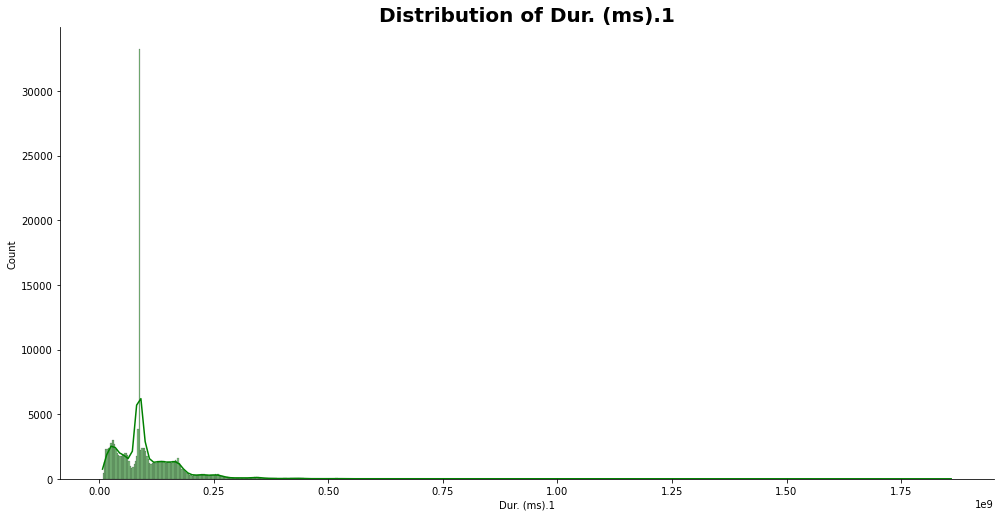

In [46]:
plot_hist(user_app_behaviour, 'Dur. (ms).1','green') 

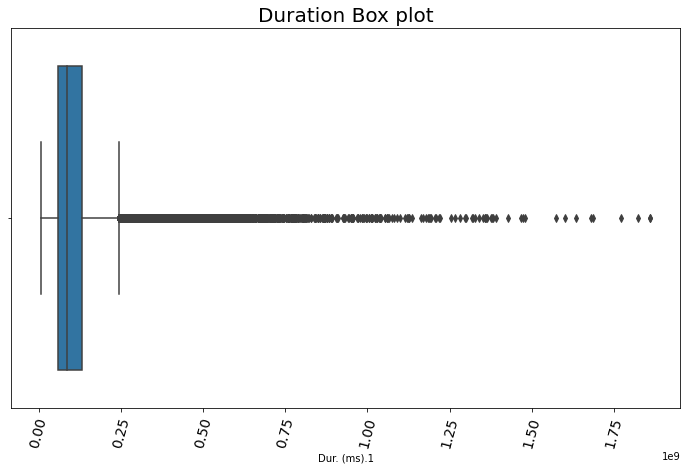

In [20]:
plot_box(user_app_behaviour, 'Dur. (ms).1', 'Duration Box plot')

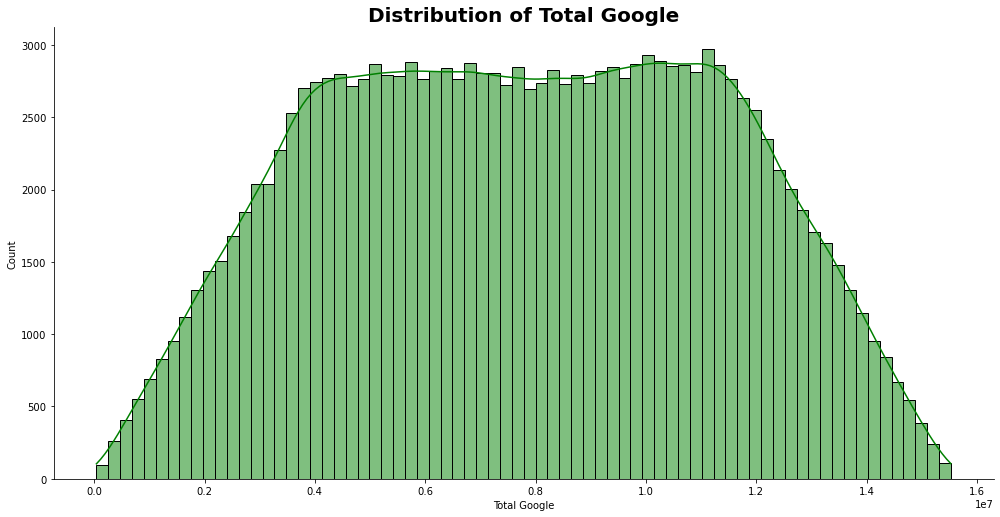

In [47]:
plot_hist(user_app_behaviour, 'Total Google', 'green')

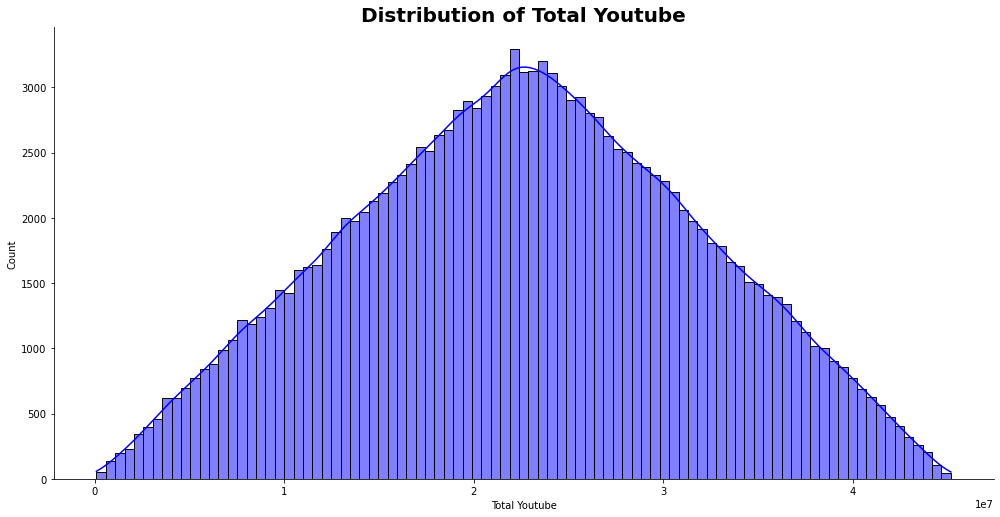

In [22]:
plot_hist(user_app_behaviour, 'Total Youtube', 'blue')

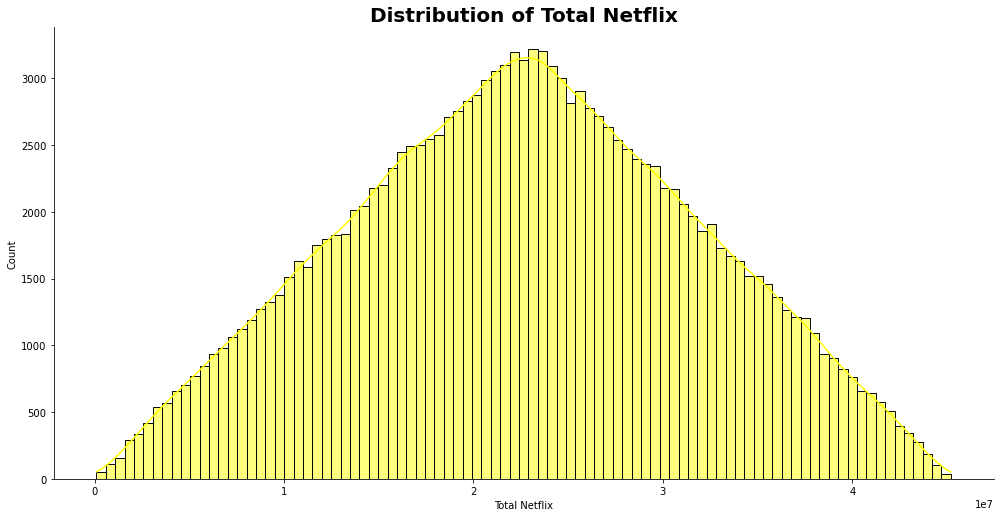

In [23]:
plot_hist(user_app_behaviour, 'Total Netflix', 'yellow')

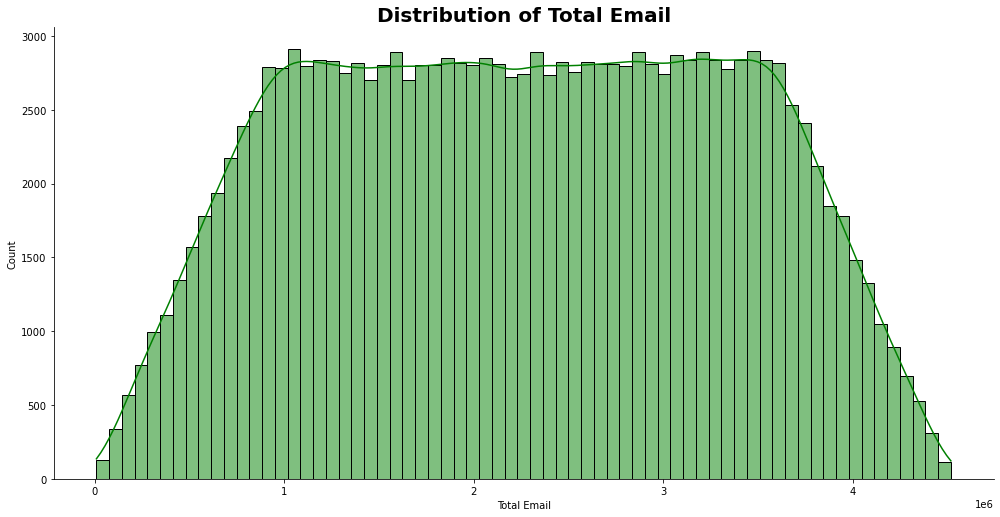

In [24]:
plot_hist(user_app_behaviour, 'Total Email', 'green')

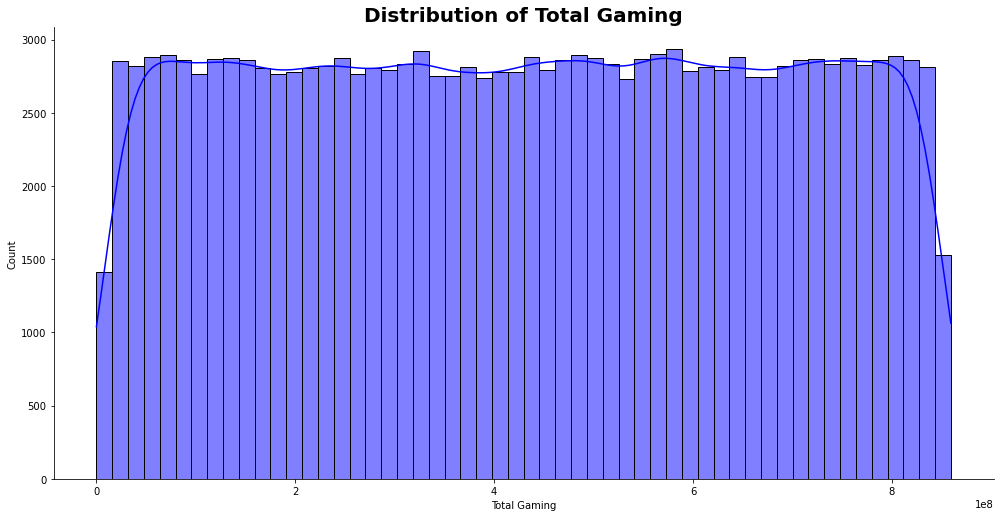

In [25]:
plot_hist(user_app_behaviour, 'Total Gaming', 'blue')

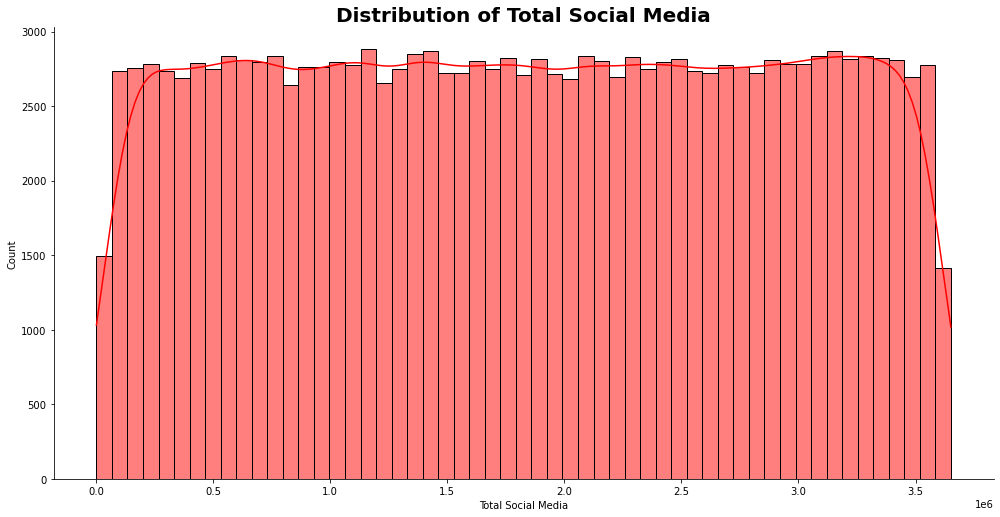

In [26]:
plot_hist(user_app_behaviour, 'Total Social Media', 'red')

Bivariate Analysis – explore the relationship between each application & the total DL+UL data 

In [48]:
per_user = user_app_behaviour.groupby('MSISDN/Number').sum()

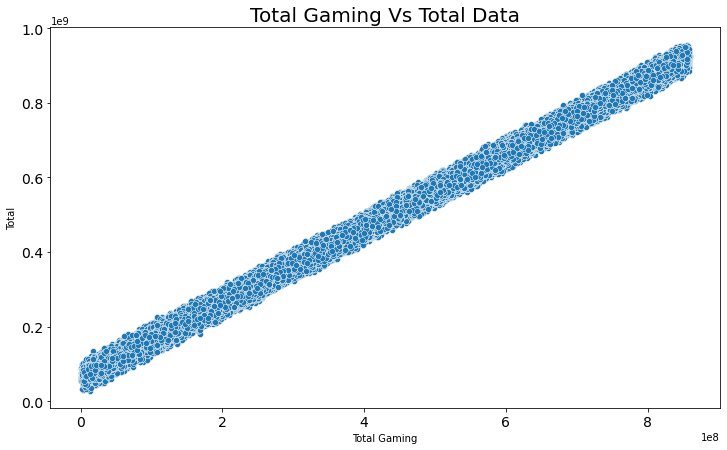

In [49]:
plot_scatter(user_app_behaviour, 'Total Gaming','Total', 'Total Gaming Vs Total Data', None, None)

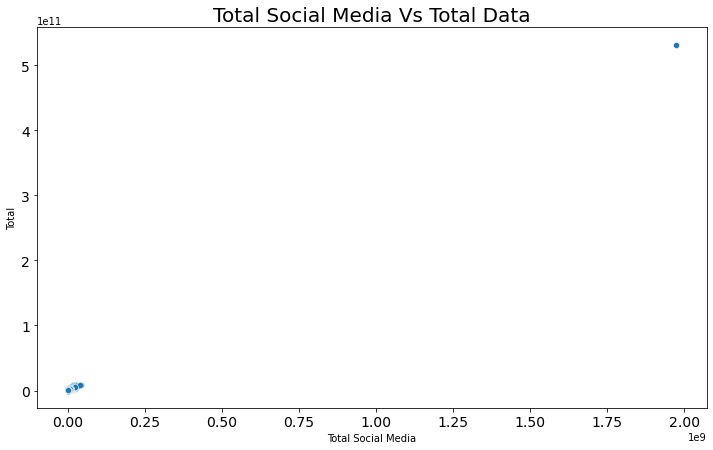

In [52]:
plot_scatter(per_user, 'Total Social Media','Total', 'Total Social Media Vs Total Data', None, None)

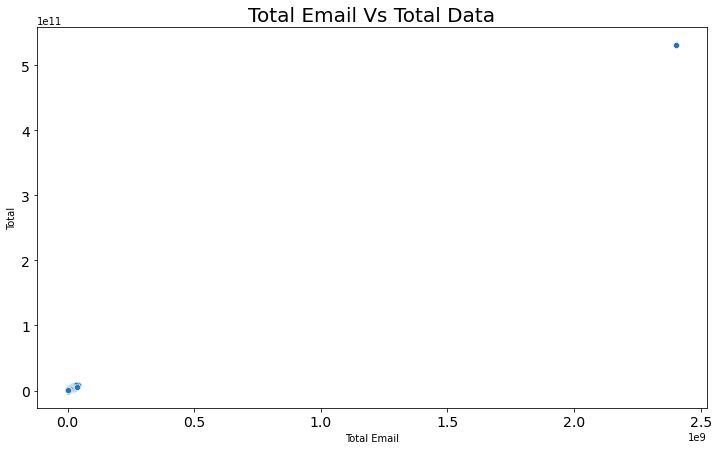

In [43]:
plot_scatter(per_user, 'Total Email','Total', 'Total Email Vs Total Data', None, None)

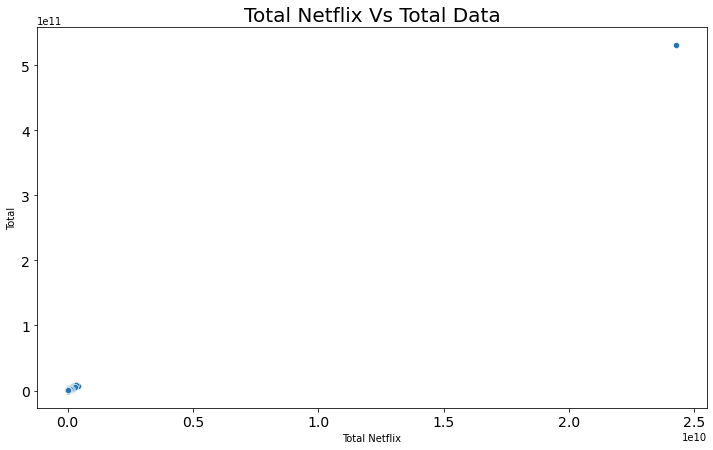

In [44]:
plot_scatter(per_user, 'Total Netflix','Total', 'Total Netflix Vs Total Data', None, None)

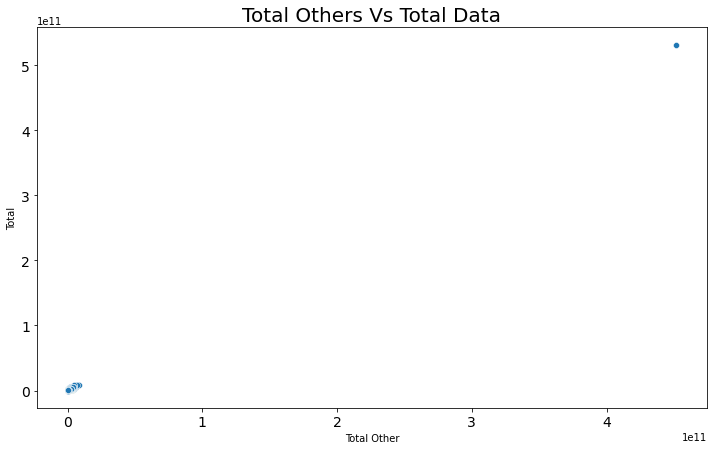

In [45]:
plot_scatter(per_user,'Total Other','Total', 'Total Others Vs Total Data', None, None)

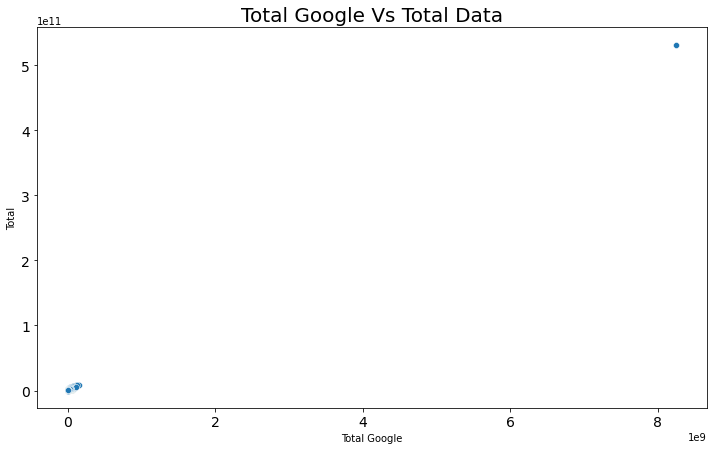

In [46]:
plot_scatter(per_user, 'Total Google','Total',  'Total Google Vs Total Data', None, None)

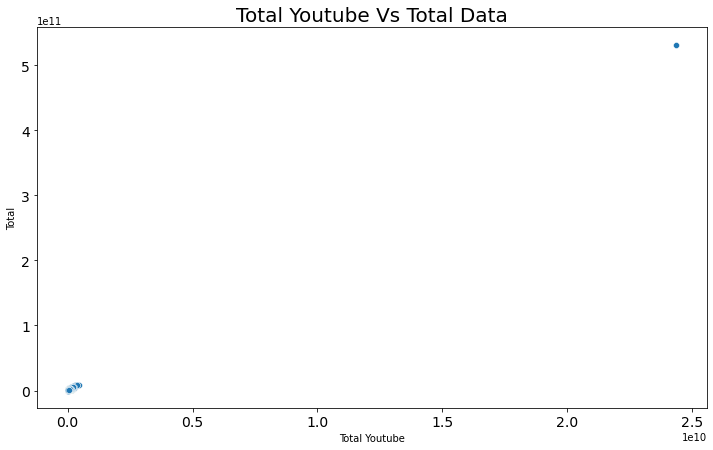

In [47]:
plot_scatter(per_user, 'Total Youtube','Total',  'Total Youtube Vs Total Data', None, None)

In [53]:
per_user

,Bearer Id,Dur. (ms).1,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
MSISDN/Number,,,,,,,,,,
"33,601,001,722.00","13,114,483,554,762,799,104.00","116,720,140.00","4,389,005.00","21,624,548.00","27,180,981.00","1,331,362.00","812,458,661.00","2,232,135.00","386,570,872.00","878,690,574.00"
"33,601,001,754.00","7,349,883,260,786,089,984.00","181,230,963.00","5,334,863.00","12,432,223.00","11,221,763.00","3,307,781.00","119,750,078.00","2,660,565.00","281,710,071.00","156,859,643.00"
"33,601,002,511.00","7,349,883,263,388,680,192.00","134,969,374.00","3,443,126.00","21,333,570.00","19,353,900.00","3,205,380.00","538,827,713.00","3,195,623.00","501,693,672.00","595,966,483.00"
"33,601,007,832.00","13,042,425,972,781,099,008.00","49,878,024.00","9,678,493.00","6,977,321.00","1,942,092.00","2,284,670.00","391,126,127.00","280,294.00","35,279,702.00","422,320,698.00"
"33,601,008,617.00","14,627,708,905,718,919,168.00","37,104,453.00","18,499,616.00","41,533,002.00","49,201,724.00","3,305,469.00","1,314,797,820.00","2,912,542.00","804,804,484.00","1,457,410,944.00"
...,...,...,...,...,...,...,...,...,...,...
"33,789,996,170.00","13,042,425,959,639,599,104.00","8,810,688.00","7,531,269.00","26,647,843.00","14,902,538.00","1,006,915.00","660,361,359.00","300,183.00","295,282,817.00","714,641,641.00"
"33,789,997,247.00","13,114,483,558,421,200,896.00","140,988,659.00","5,429,705.00","19,851,572.00","8,531,060.00","2,514,097.00","437,003,292.00","498,569.00","211,115,113.00","480,307,335.00"
"3,197,020,876,596.00","7,277,825,624,788,950,016.00","877,385,325.00","10,438,660.00","11,959,905.00","26,592,300.00","1,520,771.00","178,048,738.00","715,224.00","470,526,473.00","232,123,971.00"


Correlation Analysis – compute a correlation matrix for Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


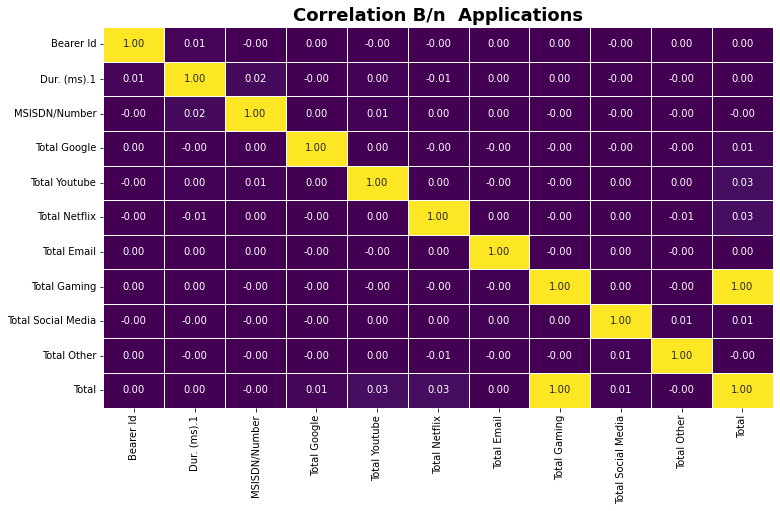

In [54]:
correlation = user_app_behaviour.corr()
plot_heatmap(correlation, 'Correlation B/n  Applications')

Variable transformations – segment the users into top five decile classes based on the total duration for all sessions

In [55]:
per_user['Decile'] = pd.qcut(per_user['Dur. (ms).1'], 5, labels = False)
per_user.head()

,Bearer Id,Dur. (ms).1,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total,Decile
MSISDN/Number,,,,,,,,,,,
"33,601,001,722.00","13,114,483,554,762,799,104.00","116,720,140.00","4,389,005.00","21,624,548.00","27,180,981.00","1,331,362.00","812,458,661.00","2,232,135.00","386,570,872.00","878,690,574.00",2
"33,601,001,754.00","7,349,883,260,786,089,984.00","181,230,963.00","5,334,863.00","12,432,223.00","11,221,763.00","3,307,781.00","119,750,078.00","2,660,565.00","281,710,071.00","156,859,643.00",3
"33,601,002,511.00","7,349,883,263,388,680,192.00","134,969,374.00","3,443,126.00","21,333,570.00","19,353,900.00","3,205,380.00","538,827,713.00","3,195,623.00","501,693,672.00","595,966,483.00",3
"33,601,007,832.00","13,042,425,972,781,099,008.00","49,878,024.00","9,678,493.00","6,977,321.00","1,942,092.00","2,284,670.00","391,126,127.00","280,294.00","35,279,702.00","422,320,698.00",0
"33,601,008,617.00","14,627,708,905,718,919,168.00","37,104,453.00","18,499,616.00","41,533,002.00","49,201,724.00","3,305,469.00","1,314,797,820.00","2,912,542.00","804,804,484.00","1,457,410,944.00",0


Compute the total data (DL+UL) per decile class

In [56]:
decile_data_usage = per_user.groupby('Decile').sum()
filter_columns = total_app_columns[1:]
filter_columns.append('Dur. (ms).1')
decile_data_usage[filter_columns]

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total,Dur. (ms).1
Decile,,,,,,,,,
0,"181,370,304,992.00","525,517,138,146.00","528,123,695,448.00","52,631,292,602.00","10,026,464,667,165.00","42,611,101,069.00","9,926,881,949,403.00","11,548,687,049,832.00","644,356,783,578.00"
1,"187,245,517,232.00","542,946,145,087.00","541,261,528,793.00","53,809,882,005.00","10,283,359,755,714.00","43,593,279,891.00","10,294,085,815,265.00","11,849,934,477,584.00","1,683,667,861,292.00"
2,"193,077,475,508.00","558,905,811,623.00","560,317,138,059.00","55,870,431,879.00","10,672,565,224,713.00","45,147,374,240.00","10,719,825,341,367.00","12,290,851,516,844.00","2,249,247,608,346.00"
3,"219,620,273,448.00","637,538,868,857.00","634,825,546,815.00","63,625,318,038.00","12,134,508,398,404.00","51,777,471,252.00","12,044,072,998,513.00","13,974,333,905,200.00","3,448,492,642,703.00"
4,"389,788,417,950.55","1,131,637,075,559.64","1,129,785,700,248.54","112,930,681,072.31","21,433,497,393,020.71","91,110,133,002.21","21,420,364,803,633.62","24,701,385,490,590.50","7,665,687,335,966.00"


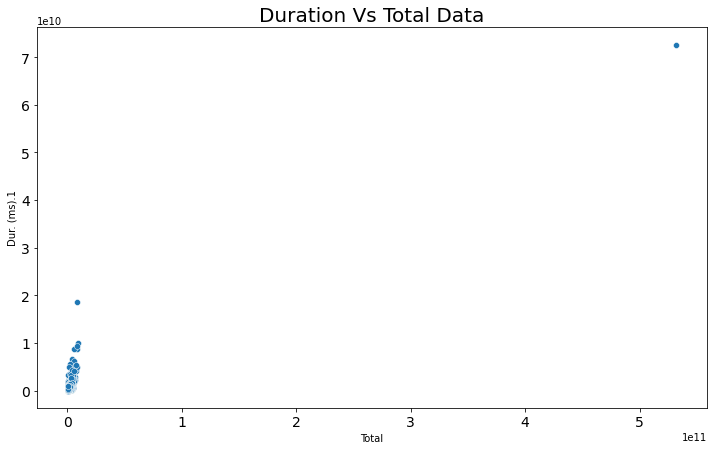

In [57]:
plot_scatter(per_user, 'Total', 'Dur. (ms).1', 'Duration Vs Total Data', None, None)

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of data  


In [59]:
pca_scaled = StandardScaler().fit_transform(X=per_user)
pca = PCA(n_components=3)
pca.fit(pca_scaled)
score = pca.transform(pca_scaled)


principalDf = pd.DataFrame(data = score
             , columns = ['PC1', 'PC2', 'PC3'])
principalDf.head()

,PC1,PC2,PC3
0,-0.24,-0.00,-0.05
1,-0.51,-0.78,0.05
2,-0.26,-0.69,-0.18
3,-0.80,1.34,0.29
4,0.39,1.54,-0.09


In [ ]:
pca.explained_variance_

## Task 2 - User Engagement analysis

Tthe user’s engagement using the following engagement metrics: 1. sessions frequency 
1. sessions frequency 
2. the duration of the session 
3. the sessions total traffic (download and upload (bytes))


### Task 2.1

Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [60]:
df_task2 = df_clean.copy()
df_task2['Total'] = df_task2['Total UL (Bytes)'] + df_task2['Total DL (Bytes)']
df_task2 = df_task2.groupby('MSISDN/Number')\
    .agg({"Bearer Id": "count", 'Dur. (ms).1':'sum', 'Total':'sum'})

df_task2.head()

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00"


In [61]:
### Top 10 Beaerer id
df_task2.sort_values(by='Bearer Id', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,663,706,799.00",1067,"72,656,111,817.00","531,963,557,516.50"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,659,725,664.00",16,"4,035,436,251.00","7,705,862,783.00"
"33,675,877,202.00",15,"4,865,953,827.00","7,891,110,608.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,667,163,239.00",13,"8,744,922,020.00","5,618,394,054.00"
"33,604,515,716.00",12,"5,207,995,411.00","5,487,855,293.00"


In [62]:
### Top 10 Duration
df_task2.sort_values(by='Dur. (ms).1', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,663,706,799.00",1067,"72,656,111,817.00","531,963,557,516.50"
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,667,163,239.00",13,"8,744,922,020.00","5,618,394,054.00"
"33,662,840,755.00",9,"6,614,274,287.00","4,000,097,981.00"
"33,664,693,736.00",9,"6,288,735,771.00","5,682,007,334.00"
"33,603,127,838.00",12,"6,287,767,483.00","4,976,195,043.00"


In [63]:
df_task2.sort_values(by='Total', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,663,706,799.00",1067,"72,656,111,817.00","531,963,557,516.50"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,675,877,202.00",15,"4,865,953,827.00","7,891,110,608.00"
"33,659,725,664.00",16,"4,035,436,251.00","7,705,862,783.00"
"33,666,464,084.00",11,"4,536,763,706.00","7,308,500,938.00"
"33,760,413,819.00",12,"5,321,673,794.00","7,132,370,514.00"


Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [64]:
min_max_scaler = preprocessing.MinMaxScaler()
df_values = df_task2.values

scalled_values = min_max_scaler.fit_transform(df_values)
df_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [65]:
print(kmeans.cluster_centers_)

[[2.10925980e-03 7.29776505e-03 3.01963803e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.31501436e-04 1.48687335e-03 1.09512676e-03]]


Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [67]:
cluster = kmeans.predict(df_normalized)
engagement_df = df_task2.copy()
engagement_df['cluster-engagement']  = cluster


In [68]:
cluster_group_df = engagement_df.groupby('cluster-engagement')
cluster_0 = cluster_group_df.get_group(0)
cluster_1 = cluster_group_df.get_group(1)
cluster_2 = cluster_group_df.get_group(2)

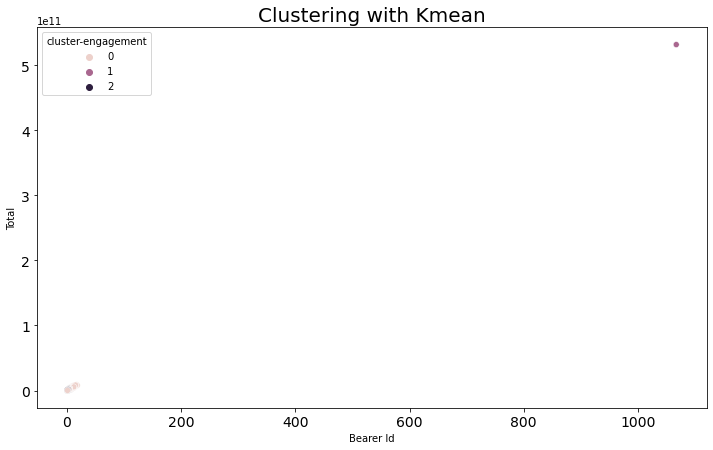

In [69]:
# Cluster 0
plot_scatter(engagement_df,"Bearer Id", "Total","Clustering with Kmean", "cluster-engagement", "")

In [70]:
# cluster 0
cluster_0.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"7,794.00","7,794.00","7,794.00","7,794.00"
mean,3.26,"538,820,278.62","1,642,231,478.67",0.00
std,1.45,"493,735,842.87","827,116,514.39",0.00
min,1.00,"170,683,118.00","52,128,380.00",0.00
25%,2.00,"351,712,234.75","1,059,444,677.25",0.00
50%,3.00,"427,361,216.00","1,554,927,675.50",0.00
75%,4.00,"529,600,252.25","2,117,009,851.00",0.00
max,18.00,"18,553,763,486.00","8,846,226,494.00",0.00


In [71]:
# cluster 1
cluster_1.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,1.00,1.00,1.00,1.00
mean,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
std,NaN,NaN,NaN,NaN
min,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
25%,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
50%,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
75%,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
max,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00


In [72]:
# cluster 2
cluster_2.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"99,061.00","99,061.00","99,061.00","99,061.00"
mean,1.25,"115,274,738.48","616,122,154.41",2.00
std,0.49,"72,110,775.90","359,846,819.28",0.00
min,1.00,"7,142,988.00","33,249,009.00",2.00
25%,1.00,"63,526,170.00","339,795,086.00",2.00
50%,1.00,"95,606,262.00","586,924,329.00",2.00
75%,1.00,"162,197,273.00","815,766,675.00",2.00
max,6.00,"399,792,738.00","3,271,920,363.00",2.00


Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [73]:
# total trafic, Application, user -> top to users
engagement = user_behaviour.reset_index().copy()

# Social Media engagement
engagement[['MSISDN/Number','Total Social Media']].sort_values(by='Total Social Media',ascending=False).head(5)

,MSISDN/Number,Total Social Media
53644,"33,663,706,799.00","1,974,198,877.21"
13526,"33,626,320,676.00","43,374,779.00"
92923,"33,760,536,639.00","39,783,189.00"
37052,"33,659,725,664.00","35,412,358.00"
6437,"33,614,892,860.00","28,294,544.00"


In [74]:
# Google Engagement
engagement[['MSISDN/Number','Total Google']].sort_values(by='Total Google',ascending=False).head(5)

,MSISDN/Number,Total Google
53644,"33,663,706,799.00","8,250,701,538.55"
13526,"33,626,320,676.00","152,191,852.00"
13180,"33,625,779,332.00","142,307,915.00"
6437,"33,614,892,860.00","127,973,787.00"
92923,"33,760,536,639.00","123,223,099.00"


In [75]:
engagement[['MSISDN/Number','Total Gaming']].sort_values(by='Total Gaming',ascending=False).head(5)

,MSISDN/Number,Total Gaming
53644,"33,663,706,799.00","461,634,610,932.71"
6437,"33,614,892,860.00","7,749,432,234.00"
92923,"33,760,536,639.00","7,461,045,228.00"
13180,"33,625,779,332.00","7,326,673,487.00"
76363,"33,675,877,202.00","6,970,567,597.00"


Plot the top 3 most used applications using appropriate charts.  

In [76]:
data = []

# Remove 'MSISDN/Number' and 'Total' from columns list
columns = user_behaviour.columns.tolist()[1:-1]

for column in columns:
    data.append(user_behaviour[column].sum())

data_df = pd.DataFrame({"Application": columns, "counts":data})

data_df.sort_values(by='counts', ascending=False)[:3]

,Application,counts
3,Total Gaming,"64,550,395,439,016.70"
4,Total Other,"64,405,230,908,181.62"
1,Total Youtube,"3,396,545,039,272.64"


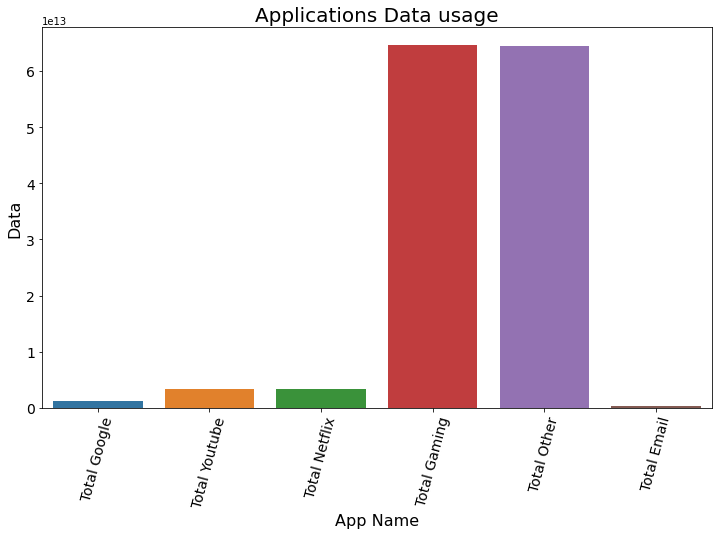

In [77]:
plot_bar(data_df,data_df['Application'], data_df['counts'], "Applications Data usage", "App Name", "Data")

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
1. What is the optimized value of k (use elbow method for this)?  
2. Interpret your findings.


In [78]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_normalized)
    distortions.append(kmeanModel.inertia_)

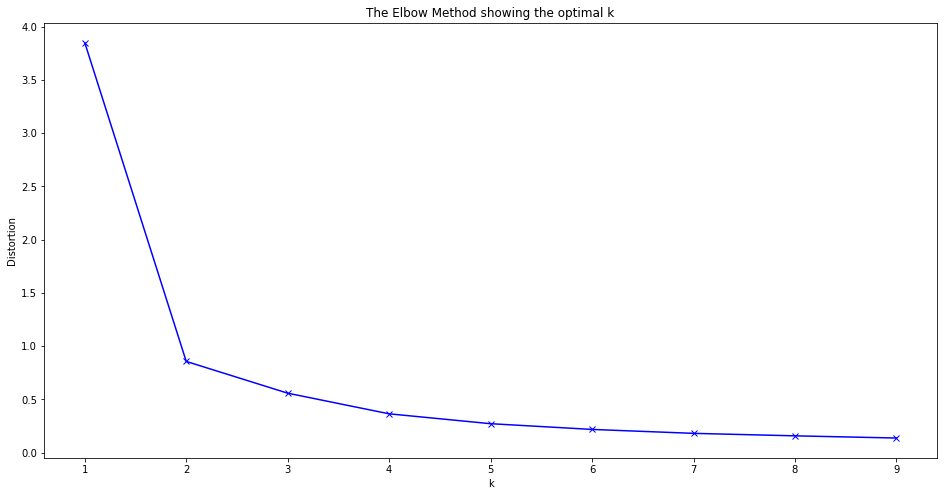

In [79]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [80]:
### so Number 3 is the optimum, and we should run with 3 cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

cluster = kmeans.predict(df_normalized)
cluster_df = df_task2.copy()
cluster_df['cluster']  = cluster
cluster_df['cluster']

MSISDN/Number
33,601,001,722.00         0
33,601,001,754.00         0
33,601,002,511.00         0
33,601,007,832.00         0
33,601,008,617.00         0
                         ..
33,789,996,170.00         0
33,789,997,247.00         0
3,197,020,876,596.00      2
337,000,037,000,919.00    0
882,397,108,489,451.00    2
Name: cluster, Length: 106856, dtype: int32

# Task 3 - Experience Analytics

### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):


1. Average TCP retransmission
2. Average RTT
3. Handset type
4. Average throughput


### How much of the data is Null ? 

In [81]:
def null_percentage(df):
    number_of_rows, number_of_columns = df.shape
    df_size = number_of_rows * number_of_columns
    
    null_size = (df.isnull().sum()).sum()
    percentage = round((null_size / df_size) * 100, 2)
    print(f"Data Fraame contain null values of { percentage }%")

In [89]:
'''
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)

Avg RTT DL (ms)
Avg RTT UL (ms)

Handset type

Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)

'''
#Read the cleaned csv file and store it on data
file_name = 'tele-data.csv'
df_task_3 = file_read.read_csv(file_name)
new_netwok_df = df_task_3[['MSISDN/Number','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)','Handset Type','Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()
#new_netwok_df = data.copy()
#new_netwok_df.info()
#new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +new_netwok_df['TCP UL Retrans. Vol (Bytes)']
#new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] + new_netwok_df['Avg Bearer TP DL (kbps)']

#new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

#new_netwok_df.head()

Data Fraame contain null values of 20.92%


MSISDN/Number                   1066
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Handset Type                    9559
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [90]:
## Fill Mising Values
for col in new_netwok_df.columns:
    if(new_netwok_df[col].isnull().sum()):
        new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])

In [91]:
null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()

Data Fraame contain null values of 0.0%


MSISDN/Number                  0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Handset Type                   0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [92]:
new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
    new_netwok_df['TCP UL Retrans. Vol (Bytes)']
new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
    new_netwok_df['Avg Bearer TP DL (kbps)']

new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

new_netwok_df.head()


,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total TCP Retrans,Total Throughput,Total RTT
0,"33,664,962,239.00","1,330.00","1,330.00",42.00,5.00,Samsung Galaxy A5 Sm-A520F,23.00,44.00,"2,660.00",46.00,47.00
1,"33,681,854,413.00","1,330.00","1,330.00",65.00,5.00,Samsung Galaxy J5 (Sm-J530),16.00,26.00,"2,660.00",32.00,70.00
2,"33,760,627,129.00","1,330.00","1,330.00",28.00,5.00,Samsung Galaxy A8 (2018),6.00,9.00,"2,660.00",12.00,33.00
3,"33,750,343,200.00","1,330.00","1,330.00",28.00,5.00,Huawei B528S-23A,44.00,44.00,"2,660.00",88.00,33.00
4,"33,699,795,932.00","1,330.00","1,330.00",28.00,5.00,Samsung Sm-G390F,6.00,9.00,"2,660.00",12.00,33.00


In [94]:
aggregate = {'Handset Type':'first','Total TCP Retrans':'sum', 'Total Throughput':'sum', 'Total RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'Total TCP Retrans', 'Total Throughput', 'Total RTT']
network_per_user_df = new_netwok_df.groupby('MSISDN/Number').agg(aggregate).reset_index()
network_per_user_df.head()

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
0,"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00
1,"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00
2,"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00
3,"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00
4,"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00


### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

1. TCP values in the dataset. 
2. RTT values in the dataset.
3. Throughput values in the dataset.

In [95]:
network_per_user_df.head(10).sort_values(by='Total TCP Retrans', ascending=False)

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
4,"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00
6,"33,601,011,634.00",Huawei Mate 10 Pro Porsche Design Huawei Mate 10,"112,892.00","81,942.00",53.00
5,"33,601,010,682.00",Samsung Galaxy A8 (2018),"6,750.00","15,044.00",57.00
8,"33,601,014,694.00",Huawei B528S-23A,"5,320.00",154.00,66.00
0,"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00
1,"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00
2,"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00
9,"33,601,020,306.00",Apple iPhone X (A1865),"2,624.00",150.00,62.00
3,"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00
7,"33,601,011,959.00",Samsung Galaxy S8 Plus (Sm-G955F),"1,608.00","1,494.00",52.00


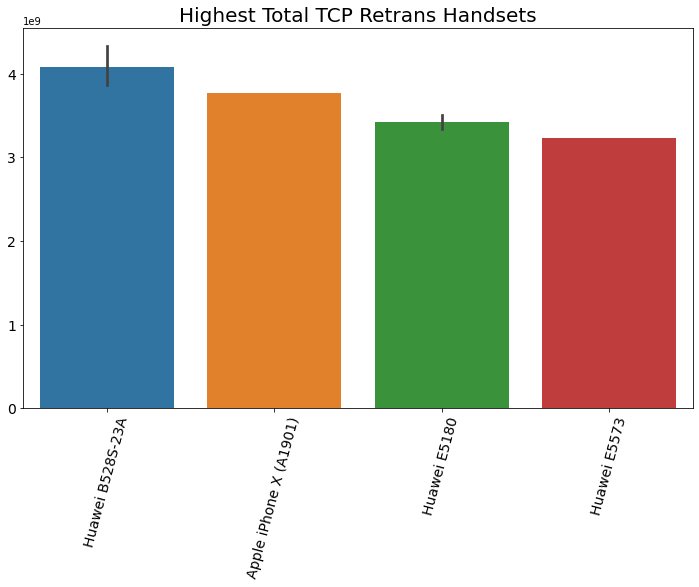

In [96]:
# Top five 
result = network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:100]
plot_bar(result, result['Handset Type'], result['Total TCP Retrans'], 'Highest Total TCP Retrans Handsets','','')

In [97]:
# Bottom 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=True)[:5]

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
23472,"33,650,128,412.00",Apple iPhone 5S (A1457),97.00,"60,460.00",48.00
6359,"33,614,777,138.00",Huawei Ascend Mate7,128.00,"16,996.00",64.00
96977,"33,762,062,356.00",Apple iPhone 8 (A1905),129.00,"63,080.00",41.00
13546,"33,626,357,513.00",Apple iPhone 7 (A1778),134.00,"20,256.00",40.00
2177,"33,607,833,304.00",Apple iPhone 5C (A1529),143.00,"32,484.00",32.00


In [98]:
# most frequent
network_per_user_df['Total TCP Retrans'].value_counts().head(3)

2,660.00    47449
5,320.00     7662
7,980.00     1108
Name: Total TCP Retrans, dtype: int64

## Task 3.3 - Compute & report:

1. The distribution of the average throughput  per handset type and provide interpretation for your findings.
2. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [99]:
handset_ave_throughput = network_per_user_df.groupby('Handset Type').agg({'Total Throughput': 'sum'}).reset_index()
handset_ave_throughput.sort_values(by='Total Throughput', ascending=False).head(5)

,Handset Type,Total Throughput
316,Huawei B528S-23A,"1,635,829,034.00"
59,Apple iPhone 7 (A1778),"135,674,378.00"
53,Apple iPhone 6S (A1688),"130,004,954.00"
49,Apple iPhone 6 (A1586),"118,531,110.00"
953,Samsung Galaxy S8 (Sm-G950F),"113,334,542.00"


In [100]:
handset_rtt = network_per_user_df.groupby('Handset Type').agg({'Total TCP Retrans': 'sum'}).reset_index()
handset_rtt.sort_values(by='Total TCP Retrans', ascending=False).head(5)
### HUawei is leading but apple is following a lot

,Handset Type,Total TCP Retrans
316,Huawei B528S-23A,"1,074,982,451,791.00"
337,Huawei E5180,"63,325,502,400.00"
341,Huawei E5573,"15,958,608,654.00"
53,Apple iPhone 6S (A1688),"11,730,194,438.00"
49,Apple iPhone 6 (A1586),"11,144,207,475.00"


### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster

In [101]:
handset= network_per_user_df['Handset Type'].unique()

net_cluster_df = network_per_user_df.copy()
net_cluster_df.drop('Handset Type', axis=1, inplace=True)
net_cluster_df = net_cluster_df.set_index('MSISDN/Number')

net_cluster_df.head()


,Total TCP Retrans,Total Throughput,Total RTT
MSISDN/Number,,,
"33,601,001,722.00","2,660.00",74.00,46.00
"33,601,001,754.00","2,660.00",96.00,31.00
"33,601,002,511.00","2,660.00",96.00,33.00
"33,601,007,832.00","2,396.00",408.00,84.00
"33,601,008,617.00","9,373,492.00","80,790.00",119.00


In [102]:
## First normalize, Then Cluster
min_max_scaler = preprocessing.MinMaxScaler()
network_values = net_cluster_df.values

scalled_values = min_max_scaler.fit_transform(network_values)
df_network_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [104]:
cluster = kmeans.predict(df_network_normalized)
experiance_df = network_per_user_df.copy()
experiance_df['cluster-experiance']  = cluster
experiance_df = experiance_df.set_index('MSISDN/Number')
experiance_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance
MSISDN/Number,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,1
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,1
"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00,1
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,1
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,1


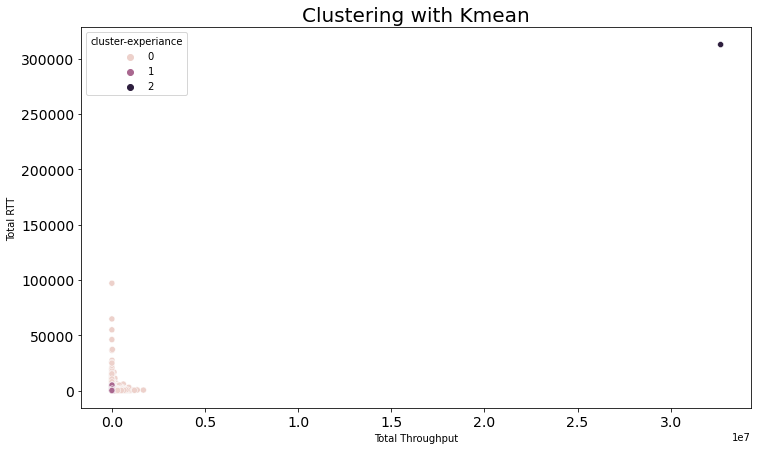

In [105]:
plot_scatter(experiance_df,"Total Throughput", "Total RTT","Clustering with Kmean", "cluster-experiance", "")

In [106]:
experiance_df['cluster-experiance'].value_counts()
## dont' know what kind of description am gonna provide for this 

1    99884
0     6971
2        1
Name: cluster-experiance, dtype: int64

## Task 4 - Satisfaction Analysis

1. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 

2. experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [107]:
## Engagement Score
lowest_engagement = engagement_df.groupby('cluster-engagement').get_group(0).mean()
lowest_engagement

Bearer Id                        3.26
Dur. (ms).1            538,820,278.62
Total                1,642,231,478.67
cluster-engagement               0.00
dtype: float64

In [108]:
def get_engagement_score(df, lowest):
    x = float(lowest['Bearer Id'])
    y = float(lowest['Dur. (ms).1'])
    z = float(lowest['Total'])
    new_df = df.copy()
    new_df['engagement score'] = ((df['Bearer Id'] - x)**2 + (df['Dur. (ms).1'] - y)**2 + (df['Total'] - z)**2)**0.5
    return new_df
engagement_scored_df = get_engagement_score(engagement_df, lowest_engagement)
engagement_scored_df.head()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement,engagement score
MSISDN/Number,,,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00",2,"872,446,697.59"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00",2,"1,527,808,760.56"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00",2,"1,121,501,669.34"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00",2,"1,314,247,633.12"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00",2,"534,675,041.23"


In [109]:
lowest_experiance = experiance_df.groupby('cluster-experiance').get_group(0).mean()
lowest_experiance

Total TCP Retrans    166,328,308.41
Total Throughput         245,795.44
Total RTT                    603.99
cluster-experiance             0.00
dtype: float64

In [110]:
def get_experiance_score(df, low):
    x = float(low['Total RTT'])
    y = float(low['Total TCP Retrans'])
    z = float(low['Total Throughput'])
    new_df = df.copy()
    new_df['experience score'] = ((df['Total RTT'] - x)**2 + (df['Total TCP Retrans'] - y)**2 \
                              + (df['Total Throughput'] - z)**2 )**0.5
    return new_df
experiance_scored_df = get_experiance_score(experiance_df, lowest_experiance)
experiance_scored_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance,experience score
MSISDN/Number,,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,1,"166,325,829.92"
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,1,"166,325,829.88"
"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00,1,"166,325,829.88"
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,1,"166,326,093.42"
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,1,"156,954,903.14"


### Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [111]:
satisfaction_df = pd.merge(engagement_scored_df["engagement score"], experiance_scored_df['experience score'], on='MSISDN/Number')
satisfaction_df['satisfaction score'] = (satisfaction_df['engagement score'] + satisfaction_df['experience score']) / 2


In [112]:
satisfaction_df.sort_values(by='satisfaction score', ascending=False).head(10)

,engagement score,experience score,satisfaction score
MSISDN/Number,,,
"33,663,706,799.00","535,202,403,385.25","166,326,826.01","267,684,365,105.63"
"33,626,320,676.00","10,400,449,916.79","10,309,451,664.60","10,354,950,790.69"
"33,625,779,332.00","19,275,942,674.73","165,981,747.24","9,720,962,210.99"
"33,614,892,860.00","11,865,341,966.73","162,829,728.84","6,014,085,847.79"
"33,760,536,639.00","11,118,916,686.22","131,790,760.23","5,625,353,723.23"
"33,667,163,239.00","9,118,660,790.67","163,675,107.37","4,641,167,949.02"
"33,667,725,464.00","573,295,006.23","8,187,880,805.36","4,380,587,905.79"
"33,659,084,281.00","279,821,272.21","7,775,531,994.04","4,027,676,633.12"
"33,660,977,522.00","543,305,060.25","7,207,812,083.61","3,875,558,571.93"


### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 

In [113]:
    
df_regression = pd.merge(engagement_df[['Bearer Id', 'Dur. (ms).1', 'Total']],\
                        experiance_df[['Total RTT','Total TCP Retrans', 'Total Throughput']],\
                       on='MSISDN/Number')
df_regression = pd.merge(df_regression,satisfaction_df['satisfaction score'], on='MSISDN/Number' )
df_regression.head()

,Bearer Id,Dur. (ms).1,Total,Total RTT,Total TCP Retrans,Total Throughput,satisfaction score
MSISDN/Number,,,,,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00",46.00,"2,660.00",74.00,"519,386,263.75"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00",31.00,"2,660.00",96.00,"847,067,295.22"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00",33.00,"2,660.00",96.00,"643,913,749.61"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00",84.00,"2,396.00",408.00,"740,286,863.27"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00",119.00,"9,373,492.00","80,790.00","345,814,972.19"


In [114]:
# scaling and fiting
X = df_regression[['Bearer Id', 'Dur. (ms).1', 'Total','Total RTT','Total TCP Retrans', 'Total Throughput']].values
X = StandardScaler().fit_transform(X)
X.shape

(106856, 6)

In [115]:
y = df_regression[['satisfaction score']].values
y = StandardScaler().fit_transform(y)
y.shape

(106856, 1)

In [116]:
model = LinearRegression().fit(X, y)
model.score(X, y)

0.8856043772209212

In [117]:
pickle.dump(model, open('../models/model.pkl', 'wb'))

### Task 4.4 - Run a k-means (k=2) on the engagement & the experience score .

In [118]:
eng_exp_df = satisfaction_df[['engagement score', 'experience score']]

In [119]:
min_max_scaler = preprocessing.MinMaxScaler()
eng_exp_values = eng_exp_df.values

scalled_values = min_max_scaler.fit_transform(eng_exp_values)
eng_exp_normalized = pd.DataFrame(data=scalled_values, columns=eng_exp_df.columns)


kmeans = KMeans(n_clusters=2).fit(eng_exp_normalized)

### Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 

In [120]:
eng_exp_df['clusters'] = kmeans.labels_
eng_exp_df['clusters'].value_counts()

0    106652
1       204
Name: clusters, dtype: int64

In [121]:
result = eng_exp_df.groupby('clusters').mean()
result

,engagement score,experience score
clusters,,
0,"1,101,863,229.05","164,694,110.25"
1,"990,365,693.41","2,995,945,458.16"


Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 

In [122]:
satisfaction_df = satisfaction_df.reset_index()
satisfaction_df.head()
satisfaction_df.to_csv('../data/satisfaction.csv')